In [ ]:
# @title Exp:1. Implementation of Classification with Multilayer Perceptron using Scikit-learn with MNIST Dataset. { display-mode: "form" }
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data/255.0  # Normalize pixel values
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, predictions)
# print(cm)
print(classification_report(y_test, predictions))
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7108 - accuracy: 0.8056 - val_loss: 0.3625 - val_accuracy: 0.9051
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3851 - accuracy: 0.8909 - val_loss: 0.2942 - val_accuracy: 0.9177
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3254 - accuracy: 0.9066 - val_loss: 0.2564 - val_accuracy: 0.9293
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2895 - accuracy: 0.9183 - val_loss: 0.2316 - val_accuracy: 0.9346
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2639 - accuracy: 0.9245 - val_loss: 0.2127 - val_accuracy: 0.9386
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3390 - accuracy: 0.9012 - val_loss: 0.1635 - val_accuracy: 0.9518
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1687 - accuracy: 0.9513 - val_loss: 0.1177 - val_accuracy: 0.9630

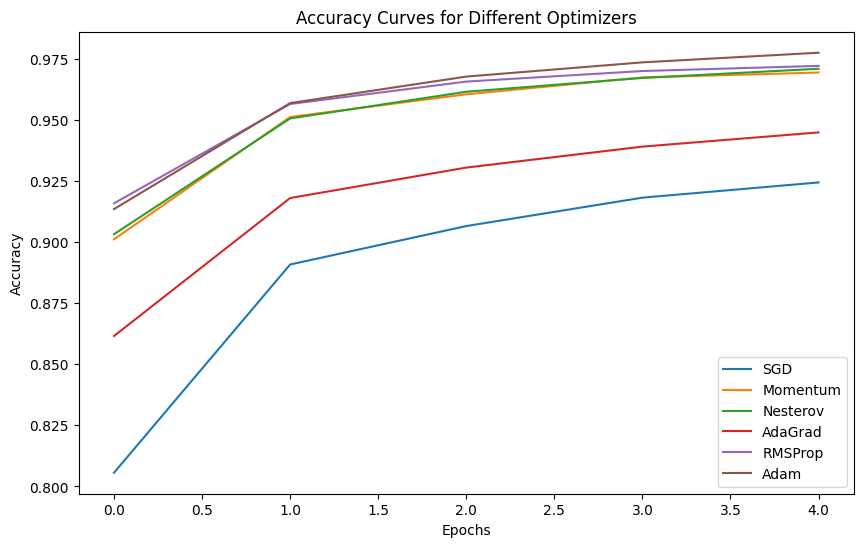

In [ ]:
# @title Exp:3. Illustrate the performance of various Optimization techniques of Gradient Descent(GD), Momentum Based GD, Nesterov Accelerated GD, Stochastic GD, AdaGrad, RMSProp, Adam
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define a function to create and compile a model
def create_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define different optimizers
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Nesterov': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    'AdaGrad': tf.keras.optimizers.Adagrad(learning_rate=0.01),
    'RMSProp': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001)
}

# Initialize a dictionary to store accuracy history for each optimizer
accuracy_history = {}

# Train and evaluate models with different optimizers
num_epochs = 5

for optimizer_name, optimizer in optimizers.items():
    model = create_model(optimizer)
    history = model.fit(X_train, y_train, epochs=num_epochs, verbose=1, validation_data=(X_test, y_test))
    accuracy_history[optimizer_name] = history.history['accuracy']

# Plot accuracy curves for each optimizer
plt.figure(figsize=(10, 6))
for optimizer_name, accuracy_values in accuracy_history.items():
    plt.plot(accuracy_values, label=optimizer_name)

plt.title('Accuracy Curves for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# @title Exp:4. Implementing of Denoising, sparse and contractive autoencoders.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization
from tensorflow.keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()
for i in range(4):
  plt.subplot(2, 2, i + 1)
plt.imshow(X_train[i], cmap=plt.cm.binary)
X_train, X_test = X_train / 255., X_test / 255.
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))
factor = .3
X_train_noisy = X_train + factor * np.random.normal(loc=0.0, scale=1.,
size=X_train.shape)
X_test_noisy = X_test + factor * np.random.normal(loc=0.0, scale=1.,
size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)
for i in range(4):
  plt.subplot(2, 2, i + 1)
plt.imshow(X_train_noisy[i].reshape(1, 28, 28)[0],
cmap=plt.cm.binary)
common_param = {
'padding': 'same',
'activation': 'relu'
}
model = Sequential([
# Encoder
Conv2D(16, (3, 3), **common_param, input_shape=(28, 28, 1)),
BatchNormalization(),
Conv2D(32, (3, 3), **common_param),
BatchNormalization(),
Conv2D(64, (3, 3), **common_param),
# Decoder
Conv2DTranspose(64, (3, 3), **common_param),
BatchNormalization(),
Conv2DTranspose(32, (3, 3), **common_param),
BatchNormalization(),
Conv2DTranspose(16, (3, 3), **common_param),
Conv2D(1, (3, 3), **common_param)
])
model.compile(optimizer='adam', loss='mean_squared_error',
metrics=['accuracy'])
model.summary()
history = model.fit(X_train_noisy, X_train, batch_size=256, epochs=5,
validation_data=(X_test_noisy, X_test))
plt.subplot(2,1,1)
plt.plot( history.history['loss'], label = 'loss')
plt.plot( history.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'best')
plt.subplot(2,1,2)
plt.plot( history.history['accuracy'], label = 'accuracy')
plt.plot( history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc = 'best')
plt.title('Model Evaluation Curve')
plt.show()
plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(5, 5, i + 1)
if i == 2:
  plt.title("Real Images", color='green')
plt.imshow(X_test[i].reshape(1, 28, 28)[0], cmap=plt.cm.binary)
plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(5, 5, i + 1)
if i == 2:
  plt.title("Noised Images", color='red')
plt.imshow(X_test_noisy[i].reshape(1, 28, 28)[0], cmap=plt.cm.binary)
plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(5, 5, i + 1)
if i == 2:
  plt.title("Denoised Images", color='blue')
plt.imshow(model.predict(X_test_noisy[i].reshape(1, 28, 28,
1)).reshape(1, 28, 28)[0], cmap=plt.cm.binary)

In [ ]:
# @title Exp:5. Compare the Performance of the Classification model using various Regularization Techniques
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1, l2

# Generate some random data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
acc_l1 = accuracy_score(y_test, y_pred_l1)
print("Accuracy with L1 regularization:", acc_l1)

# Logistic Regression with L2 Regularization
model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
acc_l2 = accuracy_score(y_test, y_pred_l2)
print("Accuracy with L2 regularization:", acc_l2)

# Neural Network with Dropout Regularization
model_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_dropout.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
_, acc_dropout = model_dropout.evaluate(X_test, y_test)
print("Accuracy with dropout regularization:", acc_dropout)